Задача 1. (2 балла)
Реализуйте слой BatchNorm (nn.BatchNorm).

In [3]:
import torch
import random
import numpy as np

class BatchNorm:
    def __init__(self, num_features, epsilon=1e-5):
        self.epsilon = epsilon
        self.gamma = torch.ones(num_features, requires_grad=True)
        self.beta = torch.zeros(num_features, requires_grad=True)

    def forward(self, x):
        batch_mean = x.mean(dim=0)
        batch_var = x.var(dim=0)
    
        x_hat = (x - batch_mean) / torch.sqrt(batch_var + self.epsilon)
        return self.gamma * x_hat + self.beta

batch_norm = BatchNorm(num_features=10)
input_data = torch.randn(32, 10, requires_grad=True)
batch_norm.forward(input_data)

tensor([[ 4.3082e-01,  4.3273e-01,  1.4884e+00,  6.8129e-01, -6.4035e-01,
         -7.1742e-01,  9.9049e-01, -1.3895e+00, -1.1934e+00,  1.7556e+00],
        [ 2.7861e+00,  5.5807e-01,  5.8653e-01, -1.4094e+00,  4.3083e-01,
          1.7640e-01,  1.3010e+00, -8.3862e-01, -1.2442e+00,  9.3473e-01],
        [ 1.0441e+00,  4.8558e-01, -1.4653e+00,  1.1008e+00, -8.5241e-01,
          9.1034e-02, -3.6947e-02, -3.7284e-01, -3.1795e-01,  1.0844e-01],
        [-3.1930e-01,  5.4259e-02, -2.1638e-01,  1.1658e+00, -1.2368e+00,
          1.8618e-01,  2.0594e+00, -4.5612e-01,  6.0744e-01, -4.1605e-01],
        [ 1.8388e-01,  1.4054e+00, -1.0816e+00,  1.0636e+00,  4.4354e-01,
          9.3934e-01,  2.9562e-01, -9.5719e-01, -1.6318e+00,  8.5206e-01],
        [-1.9200e+00,  5.7312e-01, -5.3798e-01,  8.6279e-02, -1.8731e-01,
         -5.2998e-01, -1.0662e+00,  1.2646e+00, -1.4216e+00,  1.2094e+00],
        [-1.0237e+00, -3.8184e-01,  1.0284e-01,  1.3379e+00,  2.7022e-01,
          2.8299e+00,  3.2219e-0

Задача 2. (2 балла)
Реализуйте слой Linear (nn.Linear).

In [6]:
class Linear:
    def __init__(self, in_features, out_features):
        self.weight = torch.randn(out_features, in_features, requires_grad=True)
        self.bias = torch.zeros(out_features, requires_grad=True)

    def forward(self, x):
        return x @ self.weight.T + self.bias

linear_layer = Linear(in_features=10, out_features=5)
linear_layer.forward(input_data)

tensor([[ 0.0122, -0.0151,  0.0132, -0.0344, -0.0144],
        [ 0.0062,  0.0219,  0.0074,  0.0794,  0.0289],
        [ 0.0356,  0.0635,  0.0182,  0.0548,  0.0108],
        [-0.0134,  0.0248, -0.0040, -0.0183,  0.0020],
        [ 0.0131,  0.0078, -0.0117,  0.0172,  0.0022],
        [ 0.0221,  0.0037, -0.0103,  0.0691, -0.0258],
        [-0.0006, -0.0692, -0.0093, -0.0521, -0.0403],
        [ 0.0002,  0.0107, -0.0104,  0.0367,  0.0086],
        [-0.0121,  0.0026,  0.0217, -0.0077,  0.0306],
        [-0.0151, -0.0098, -0.0412,  0.0708, -0.0039],
        [ 0.0069, -0.0228,  0.0007,  0.0558,  0.0078],
        [-0.0051, -0.0304, -0.0366, -0.0104, -0.0232],
        [-0.0555, -0.0112, -0.0319,  0.0235,  0.0495],
        [-0.0416,  0.0043, -0.0002,  0.0245,  0.0105],
        [ 0.0192,  0.0357, -0.0116,  0.0492, -0.0247],
        [ 0.0242, -0.0043,  0.0538,  0.0103,  0.0172],
        [ 0.0054, -0.0260,  0.0383, -0.0450, -0.0230],
        [-0.0521,  0.0261, -0.0245, -0.0012,  0.0188],
        [-

Задача 3. (2 балла)
Реализуйте слой Dropout(nn.Dropout)

In [10]:
import torch

class Dropout:
    def __init__(self, p=0.5):
        self.p = p

    def forward(self, x, training=True):
        if training:
            mask = (torch.rand_like(x) > self.p).float()
            return x * mask / (1 - self.p)
        return x

dropout_layer = Dropout(p=0.5)
dropout_layer.forward(input_data, training=True)

tensor([[-0.0000e+00, -0.0000e+00,  0.0000e+00,  0.0000e+00,  1.9725e-01,
          0.0000e+00, -0.0000e+00,  8.3385e-01,  0.0000e+00, -5.1205e-01],
        [ 2.5607e+00, -1.8224e+00,  0.0000e+00, -0.0000e+00,  0.0000e+00,
         -4.6432e+00,  2.6459e+00,  8.7414e-01,  0.0000e+00,  0.0000e+00],
        [ 9.7186e-02,  0.0000e+00,  0.0000e+00, -1.4217e+00, -1.1807e+00,
         -0.0000e+00,  2.6858e+00,  0.0000e+00, -0.0000e+00, -0.0000e+00],
        [-0.0000e+00,  2.2985e+00,  1.4839e+00, -0.0000e+00,  0.0000e+00,
         -1.2883e+00, -1.5817e+00, -2.7148e+00,  0.0000e+00, -1.4923e+00],
        [-8.6530e-01,  0.0000e+00,  2.0481e+00,  7.9840e-01, -2.4694e+00,
         -2.2235e+00, -3.2890e+00,  1.1327e+00, -1.6006e+00,  7.4241e-01],
        [-7.9935e-01, -4.7837e+00,  3.2748e+00, -0.0000e+00,  6.5692e-01,
          0.0000e+00,  0.0000e+00,  1.9659e+00, -0.0000e+00, -0.0000e+00],
        [-3.1125e+00,  0.0000e+00, -1.6622e+00,  1.1534e+00,  0.0000e+00,
          0.0000e+00, -3.1389e+0

Задание 3. 6 баллов
Реализуйте следующие классы (указана сигнатура init):

BaseTransform(p: float) [базовый класс для всех трансформаций]
RandomCrop(p: float, **kwargs)
RandomRotate(p: float, **kwargs)
RandomZoom(p: float, **kwargs) {*}
ToTensor()
Compose(list[BaseTransform])
Последний класс должен принимать на вход список инстансов трех других. При вызове метода call он должен последовательно вызывать трансформации из списка. При вызове каждого из них с вероятностью p должно применяться изменение изображения, с вероятностью 1-p должно возвращаться исходное изображение. Класс входного изображения у всех классов - PIL.Image, выходного тоже. Класс ToTensor должен принимать на вход PIL.Image, возвращать - torch.Tensor.

In [4]:
from PIL import Image
from matplotlib import pyplot as plt

class BaseTransform:
    def __init__(self, p: float):
        self.p = p

    def __call__(self, image: Image.Image):
        raise NotImplementedError("Subclasses should implement this method.")

(24, 24)

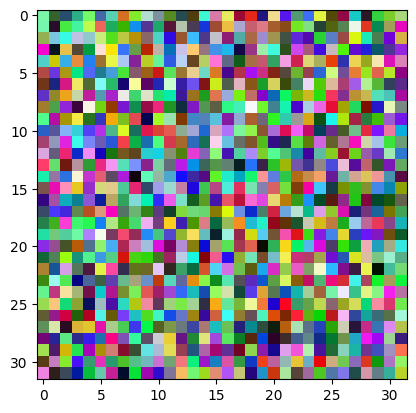

In [5]:
class RandomCrop(BaseTransform):
    def __init__(self, p: float, size: tuple):
        super().__init__(p)
        self.size = size

    def __call__(self, image: Image.Image):
        if random.random() < self.p:
            w, h = image.size
            crop_h, crop_w = self.size

            top = random.randint(0, h - crop_h)
            left = random.randint(0, w - crop_w)

            return image.crop((left, top, left + crop_w, top + crop_h))

        return image
    
input_image = Image.fromarray((np.random.rand(32, 32, 3) * 255).astype(np.uint8))
plt.imshow(input_image)
random_crop = RandomCrop(p=0.5, size=(24, 24))
cropped_image = random_crop(input_image)
# plt.imshow(cropped_image)
cropped_image.size

(32, 32)

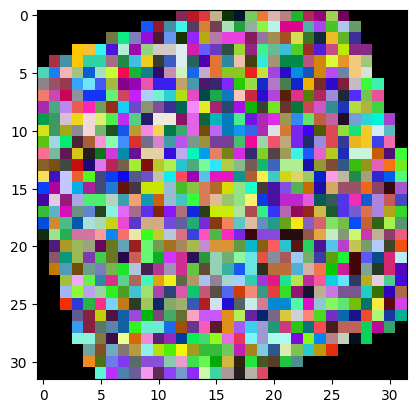

In [35]:
class RandomRotate(BaseTransform):
    def __init__(self, p: float, angles: tuple):
        super().__init__(p)
        self.angles = angles

    def __call__(self, image: Image.Image):
        if random.random() < self.p:
            angle = random.uniform(*self.angles)
            return image.rotate(angle)

        return image
    
random_rotate = RandomRotate(p=0.5, angles=(-30, 30))
rotated_image = random_rotate(input_image)
plt.imshow(rotated_image)
rotated_image.size

(32, 32)

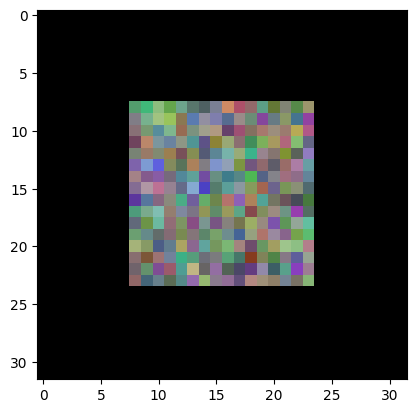

In [6]:
class RandomZoom(BaseTransform):
    def __init__(self, p: float, zoom_range: tuple):
        super().__init__(p)
        self.zoom_range = zoom_range

    def __call__(self, image: Image.Image):
        if random.random() < self.p:
            zoom_factor = random.uniform(*self.zoom_range)

            w, h = image.size
            new_w, new_h = int(w * zoom_factor), int(h * zoom_factor)

            zoomed_image = image.resize((new_w, new_h))

            left = (new_w - w) // 2
            top = (new_h - h) // 2
            right = left + w
            bottom = top + h

            return zoomed_image.crop((left, top, right, bottom))

        return image
    
random_zoom = RandomZoom(p=1, zoom_range=(0.5, 0.5))
zoomed_image = random_zoom(input_image)
plt.imshow(zoomed_image)
zoomed_image.size

In [67]:
class ToTensor:
    def __call__(self, image: Image.Image) -> torch.Tensor:
        return torch.from_numpy(np.array(image)).permute(2, 0, 1).float() if image.mode == 'RGB' else torch.from_numpy(np.array(image)).unsqueeze(0).float()
    
to_tensor = ToTensor()
tensor_image = to_tensor(input_image)
tensor_image.shape

torch.Size([3, 32, 32])

(32, 32)

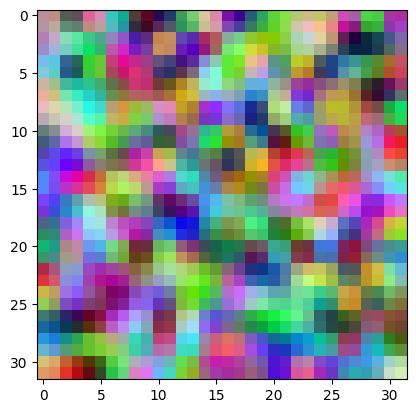

In [68]:
class Compose:
    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, image: Image.Image) -> Image.Image:
        for transform in self.transforms:
            image = transform(image)
        return image

random_crop = RandomCrop(p=0.5, size=(24, 24))
random_rotate = RandomRotate(p=0.5, angles=(-30, 30))
random_zoom = RandomZoom(p=0.5, zoom_range=(2.0, 2.0))

composed_transform = Compose([random_crop, random_rotate, random_zoom])

output_image = composed_transform(input_image)
plt.imshow(output_image)
output_image.size

Задание 4. 3 балла
Примените трансформации из задания 3 в качестве трансформаций датасета из практики 2.2. В этом задании можно пользоваться torch.nn, за исключением трансформаций. Покажите, как меняются лосс и метрики на трейне и на тесте в зависимости от количества и вероятностей трансформаций. Проведите обучение на большом количестве эпох. Опишите, что вы наблюдаете для каждого случая и какая есть разница, если применить трансформации.

In [77]:
class Resize(BaseTransform):
    def __init__(self, size: tuple, p: float):
        super().__init__(p)
        self.size = size

    def __call__(self, image: Image.Image):
        return image.resize(self.size)

In [69]:
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets
from torch.utils.data import DataLoader

def get_dataloaders(transformations, batch_size=64):
    train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transformations)
    test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=ToTensor())

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    return train_loader, test_loader

In [70]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = nn.ReLU()(self.conv1(x))
        x = nn.MaxPool2d(2)(x)
        x = nn.ReLU()(self.conv2(x))
        x = nn.MaxPool2d(2)(x)
        x = x.view(x.size(0), -1)
        x = nn.ReLU()(self.fc1(x))
        return self.fc2(x)

In [73]:
def train(model, train_loader, criterion, optimizer, epochs):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        avg_loss = running_loss / len(train_loader)
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.4f}')
    return avg_loss

def evaluate(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

In [79]:
def run_experiment(params, epochs=10):
    results = []
    
    for crop_p, rotate_p, zoom_p in params:
        transformations = Compose([
            RandomCrop(p=crop_p, size=(28, 28)),
            RandomRotate(p=rotate_p, angles=(-30, 30)),
            RandomZoom(p=zoom_p, zoom_range=(1.0, 1.5)),
            Resize(size=(28, 28), p=1),
            ToTensor()
        ])
        
        train_loader, test_loader = get_dataloaders(transformations)
        
        model = SimpleCNN()
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)

        avg_loss = train(model, train_loader, criterion, optimizer, epochs)

        accuracy = evaluate(model, test_loader)
        
        results.append((crop_p, rotate_p, zoom_p, avg_loss, accuracy))
        print(f'Crop P: {crop_p}, Rotate P: {rotate_p}, Zoom P: {zoom_p}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%')


params = [
    (0.0, 0.0, 0.0),
    (0.5, 0.5, 0.5),
    (0.7, 0.3, 0.7),
    (0.9, 0.5, 0.5),
    (0.5, 0.7, 0.3)
]

run_experiment(params, epochs=20)

Epoch [1/20], Loss: 0.4969
Epoch [2/20], Loss: 0.2769
Epoch [3/20], Loss: 0.2421
Epoch [4/20], Loss: 0.2125
Epoch [5/20], Loss: 0.1945
Epoch [6/20], Loss: 0.1748
Epoch [7/20], Loss: 0.1593
Epoch [8/20], Loss: 0.1446
Epoch [9/20], Loss: 0.1320
Epoch [10/20], Loss: 0.1168
Epoch [11/20], Loss: 0.1092
Epoch [12/20], Loss: 0.0985
Epoch [13/20], Loss: 0.0945
Epoch [14/20], Loss: 0.0885
Epoch [15/20], Loss: 0.0767
Epoch [16/20], Loss: 0.0740
Epoch [17/20], Loss: 0.0739
Epoch [18/20], Loss: 0.0628
Epoch [19/20], Loss: 0.0675
Epoch [20/20], Loss: 0.0550
Crop P: 0.0, Rotate P: 0.0, Zoom P: 0.0, Loss: 0.0550, Accuracy: 90.68%
Epoch [1/20], Loss: 0.7173
Epoch [2/20], Loss: 0.4785
Epoch [3/20], Loss: 0.4362
Epoch [4/20], Loss: 0.4122
Epoch [5/20], Loss: 0.3923
Epoch [6/20], Loss: 0.3873
Epoch [7/20], Loss: 0.3723
Epoch [8/20], Loss: 0.3627
Epoch [9/20], Loss: 0.3572
Epoch [10/20], Loss: 0.3519
Epoch [11/20], Loss: 0.3441
Epoch [12/20], Loss: 0.3404
Epoch [13/20], Loss: 0.3330
Epoch [14/20], Loss: 0